In [76]:
import dmba
#Load the data
housing_df = dmba.load_data('BostonHousing.csv')

In [42]:
#display column/variable names
columns = list(housing_df.columns)
print("Variables in the data are: ")
print(columns)

Variables in the data are: 
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV']


In [43]:
#review first 5 records in the data
print("\nFirst 5 records in the data are:")
housing_df.head()


First 5 records in the data are:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [44]:
# select columns for regression analysis
housing_df.columns
outcome = 'MEDV'
predictors = ['CRIM', 'CHAS', 'RM']

x = housing_df[predictors]
y = housing_df[outcome]

In [45]:
from sklearn.linear_model import LinearRegression
# fit the regression model y on x
housing_lm = LinearRegression()
housing_lm.fit(x,y)

# regression model, prinit coefficients
print('intercept', housing_lm.intercept_)
print(pd.DataFrame({'Predictor' : x.columns, 'coefficient' : housing_lm.coef_}))

intercept -28.81068250635914
  Predictor  coefficient
0      CRIM    -0.260724
1      CHAS     3.763037
2        RM     8.278180


In [46]:
new_df = pd.DataFrame(
    [[0.1, 0, 6]],
    columns=['CRIM', 'CHAS', 'RM'])
new_df

,CRIM,CHAS,RM
0,0.1,0,6


In [47]:
housing_lm_pred = housing_lm.predict(new_df)
print('Predicted value for median house price based on the model built using dataset is:', housing_lm_pred)

Predicted value for median house price based on the model built using dataset is: [20.83232392]


In [48]:
#variables in the data
housing_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [49]:
#Create a new dataframe with predictors
predictors_df = housing_df
columns = list(housing_df.columns)
columns.remove('CHAS')
columns.remove('MEDV')
columns.remove('CAT. MEDV')
predictors_df = predictors_df[columns]
predictors_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

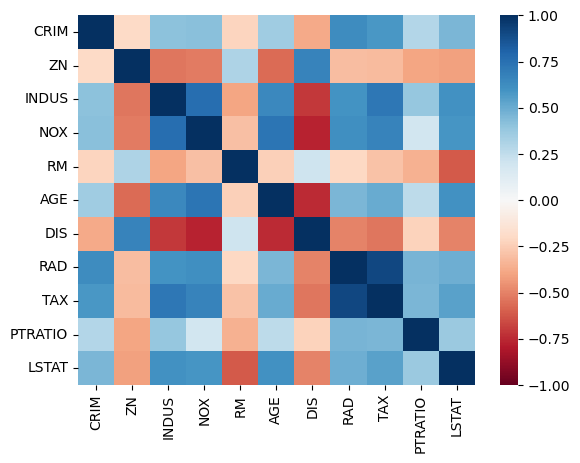

In [50]:
import seaborn as sns
corr = predictors_df.corr()
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1,
               cmap="RdBu")

In [51]:
#correlation table
corr

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044


In [52]:
# partition the data into training (60%) and validation (40%) sets
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
outcome = 'MEDV'

In [53]:
# partition the data
from sklearn.model_selection import train_test_split
X = pd.get_dummies(housing_df[predictors], drop_first=True)
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y, = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set', valid_X.shape)

Training set: (303, 12) Validation set (203, 12)


In [63]:
#backward elimination
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose = True)
print("Best Subset:", best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=1807.23
Step: score=1805.30, remove AGE
Step: score=1803.57, remove INDUS
Step: score=1803.57, remove None
Best Subset: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [66]:
# forward selection

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose = True)
print("Best Subset:", best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, add None
Best Subset: ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']


In [67]:
# stepwise (both) method
best_model, best_variables, = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
print("Best Subset:", best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, unchanged None
Best Subset: ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']


In [68]:
# fit the model with best subset variables
outcome = 'MEDV'
predictors = ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']

X = train_X[predictors]
y = train_y

In [72]:
#fit the regression model y on X
house_lm = LinearRegression()
house_lm.fit(X,y)

#regression model, print coefficients
print('intercept', house_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': house_lm.coef_}))

intercept 38.956156498282255
  Predictor  coefficient
0     LSTAT    -0.514444
1        RM     3.480964
2   PTRATIO    -0.804964
3      CHAS     2.359986
4       NOX   -17.866926
5       DIS    -1.438596
6        ZN     0.066221
7      CRIM    -0.114137
8       RAD     0.262455
9       TAX    -0.011166


In [73]:
print("\nModel performance on training data:")
regressionSummary(train_y, house_lm.predict(train_X[predictors]))


Model performance on training data:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.5615
            Mean Absolute Error (MAE) : 3.1662
          Mean Percentage Error (MPE) : -3.4181
Mean Absolute Percentage Error (MAPE) : 16.4898


In [75]:
#predict process in validation set, print first few predictede/actual values and residuals
house_lm_pred = house_lm.predict(valid_X[predictors])
result = pd.DataFrame({'Predicted': house_lm_pred, 'Actual': valid_y, 'Residual': valid_y - house_lm_pred})

#print performance measures (validation set)
print("\nModel performance on validation data")
regressionSummary(valid_y, house_lm_pred)


Model performance on validation data

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733
